# Bayes Formula All terms explicit equation for MNIST Dataset

MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


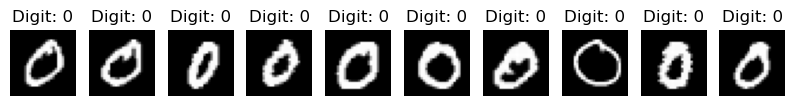

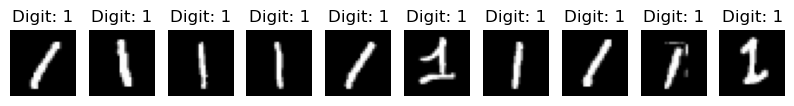

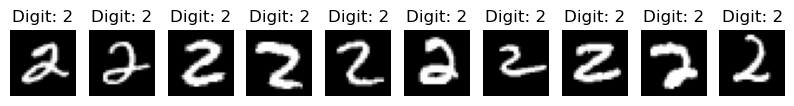

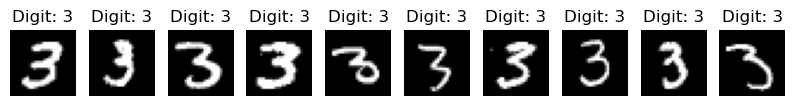

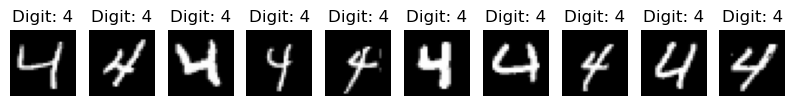

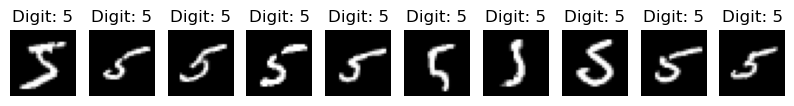

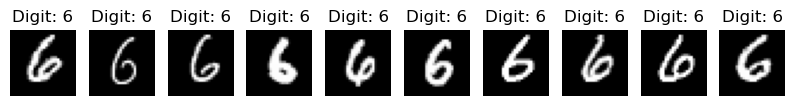

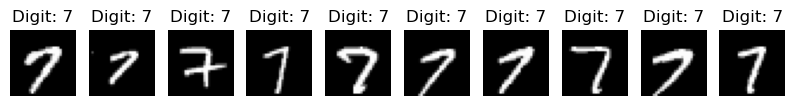

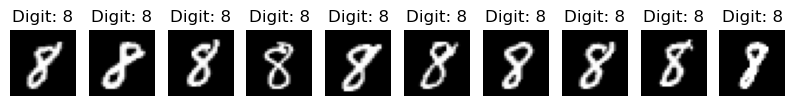

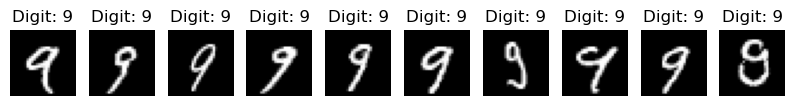

c:\Users\Akshay Patil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


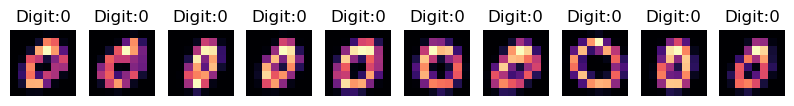

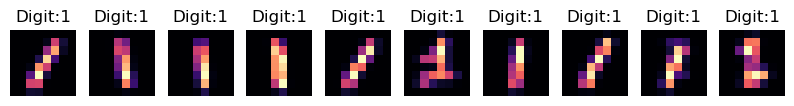

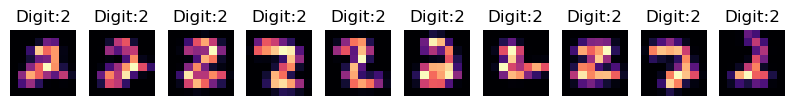

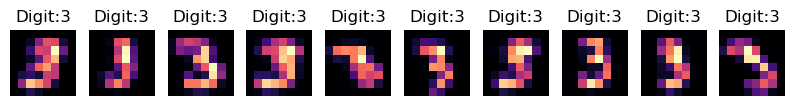

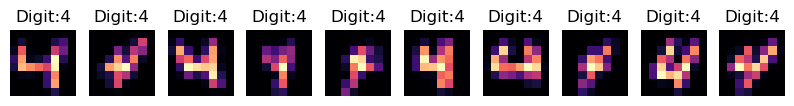

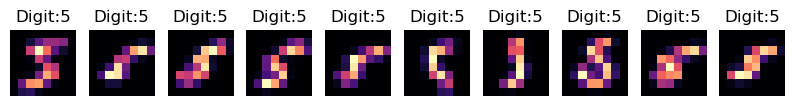

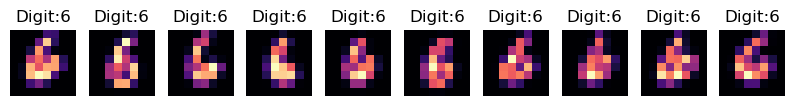

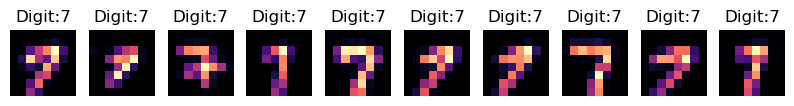

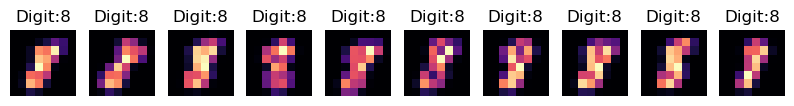

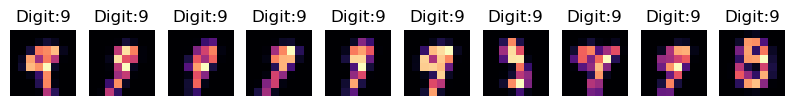

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [2]:
# MNIST Dataset Preprocessing

# Quantum Amplitude Encoding
import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"D:\Downloads Now\archive\train-images.idx3-ubyte"
train_labels_file = r"D:Downloads Now\archive\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits
N = 8
from skimage.transform import resize

def resize_images(images, new_size = (N,N)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (N,N)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2,1))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2,1))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2,1))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2,1))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2,1))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2,1))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2,1))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2,1))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2,1))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2,1))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_[:5000])
Input_state_vector_one = np.array(Digit_one_[:5000])
Input_state_vector_two = np.array(Digit_two_[:5000])
Input_state_vector_three = np.array(Digit_three_[:5000])
Input_state_vector_four = np.array(Digit_four_[:5000])
Input_state_vector_fifth = np.array(Digit_five_[:5000])
Input_state_vector_sixth = np.array(Digit_sixth_[:5000])
Input_state_vector_seventh = np.array(Digit_seventh_[:5000])
Input_state_vector_eigth = np.array(Digit_eigth_[:5000])
Input_state_vector_nineth = np.array(Digit_nineth_[:5000])

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.array(input_state_vectors)

input_state_vectors = input_state_vectors.reshape(50000,N*N)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((N, N))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2))/np.linalg.norm(images_resized[i]))

input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

CHEBYSHEV-POLYNOMIAL EQUATIONS FOR SELECTED DEGREES

ReLU activation :


c:\Users\Akshay Patil\anaconda3\Lib\site-packages\numpy\lib\twodim_base.py:632: RuntimeWarning: overflow encountered in accumulate
  multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)


  • degree  10 →  1.92420297554 + 0.540312514146*x + 0.0308680938722*x^2 + -0.000232261539627*x^3 + -3.61423544697e-05*x^4 + 4.04832089433e-07*x^5 + 2.95770928852e-08*x^6 + -2.75627169762e-10*x^7 + -1.26537412732e-11*x^8
  • degree  20 →  0.771152590697 + 0.424557907535*x + 0.0704992037447*x^2 + 0.00184904935148*x^3 + -0.000393490575745*x^4 + -1.55302237418e-05*x^5 + 1.51736879078e-06*x^6 + 6.42355148052e-08*x^7 + -3.40673823041e-09*x^8 + -1.51240500005e-10*x^9 + 4.47420943906e-12*x^10
  • degree  37 →  0.273554801609 + 0.430797243718*x + 0.150647541963*x^2 + 0.00551660810079*x^3 + -0.00328975487933*x^4 + -0.000154515981482*x^5 + 4.82611794251e-05*x^6 + 2.21827664424e-06*x^7 + -4.31532049004e-07*x^8 + -1.92277683954e-08*x^9 + 2.50025580694e-09*x^10 + 1.10131988136e-10*x^11 + -9.87142500594e-12*x^12
    (Best degree = 37,  max-error ≈ 2.726e-01)
Starting systematic error analysis across polynomial degrees 1-100...
This may take a few minutes...
Processing ReLU...


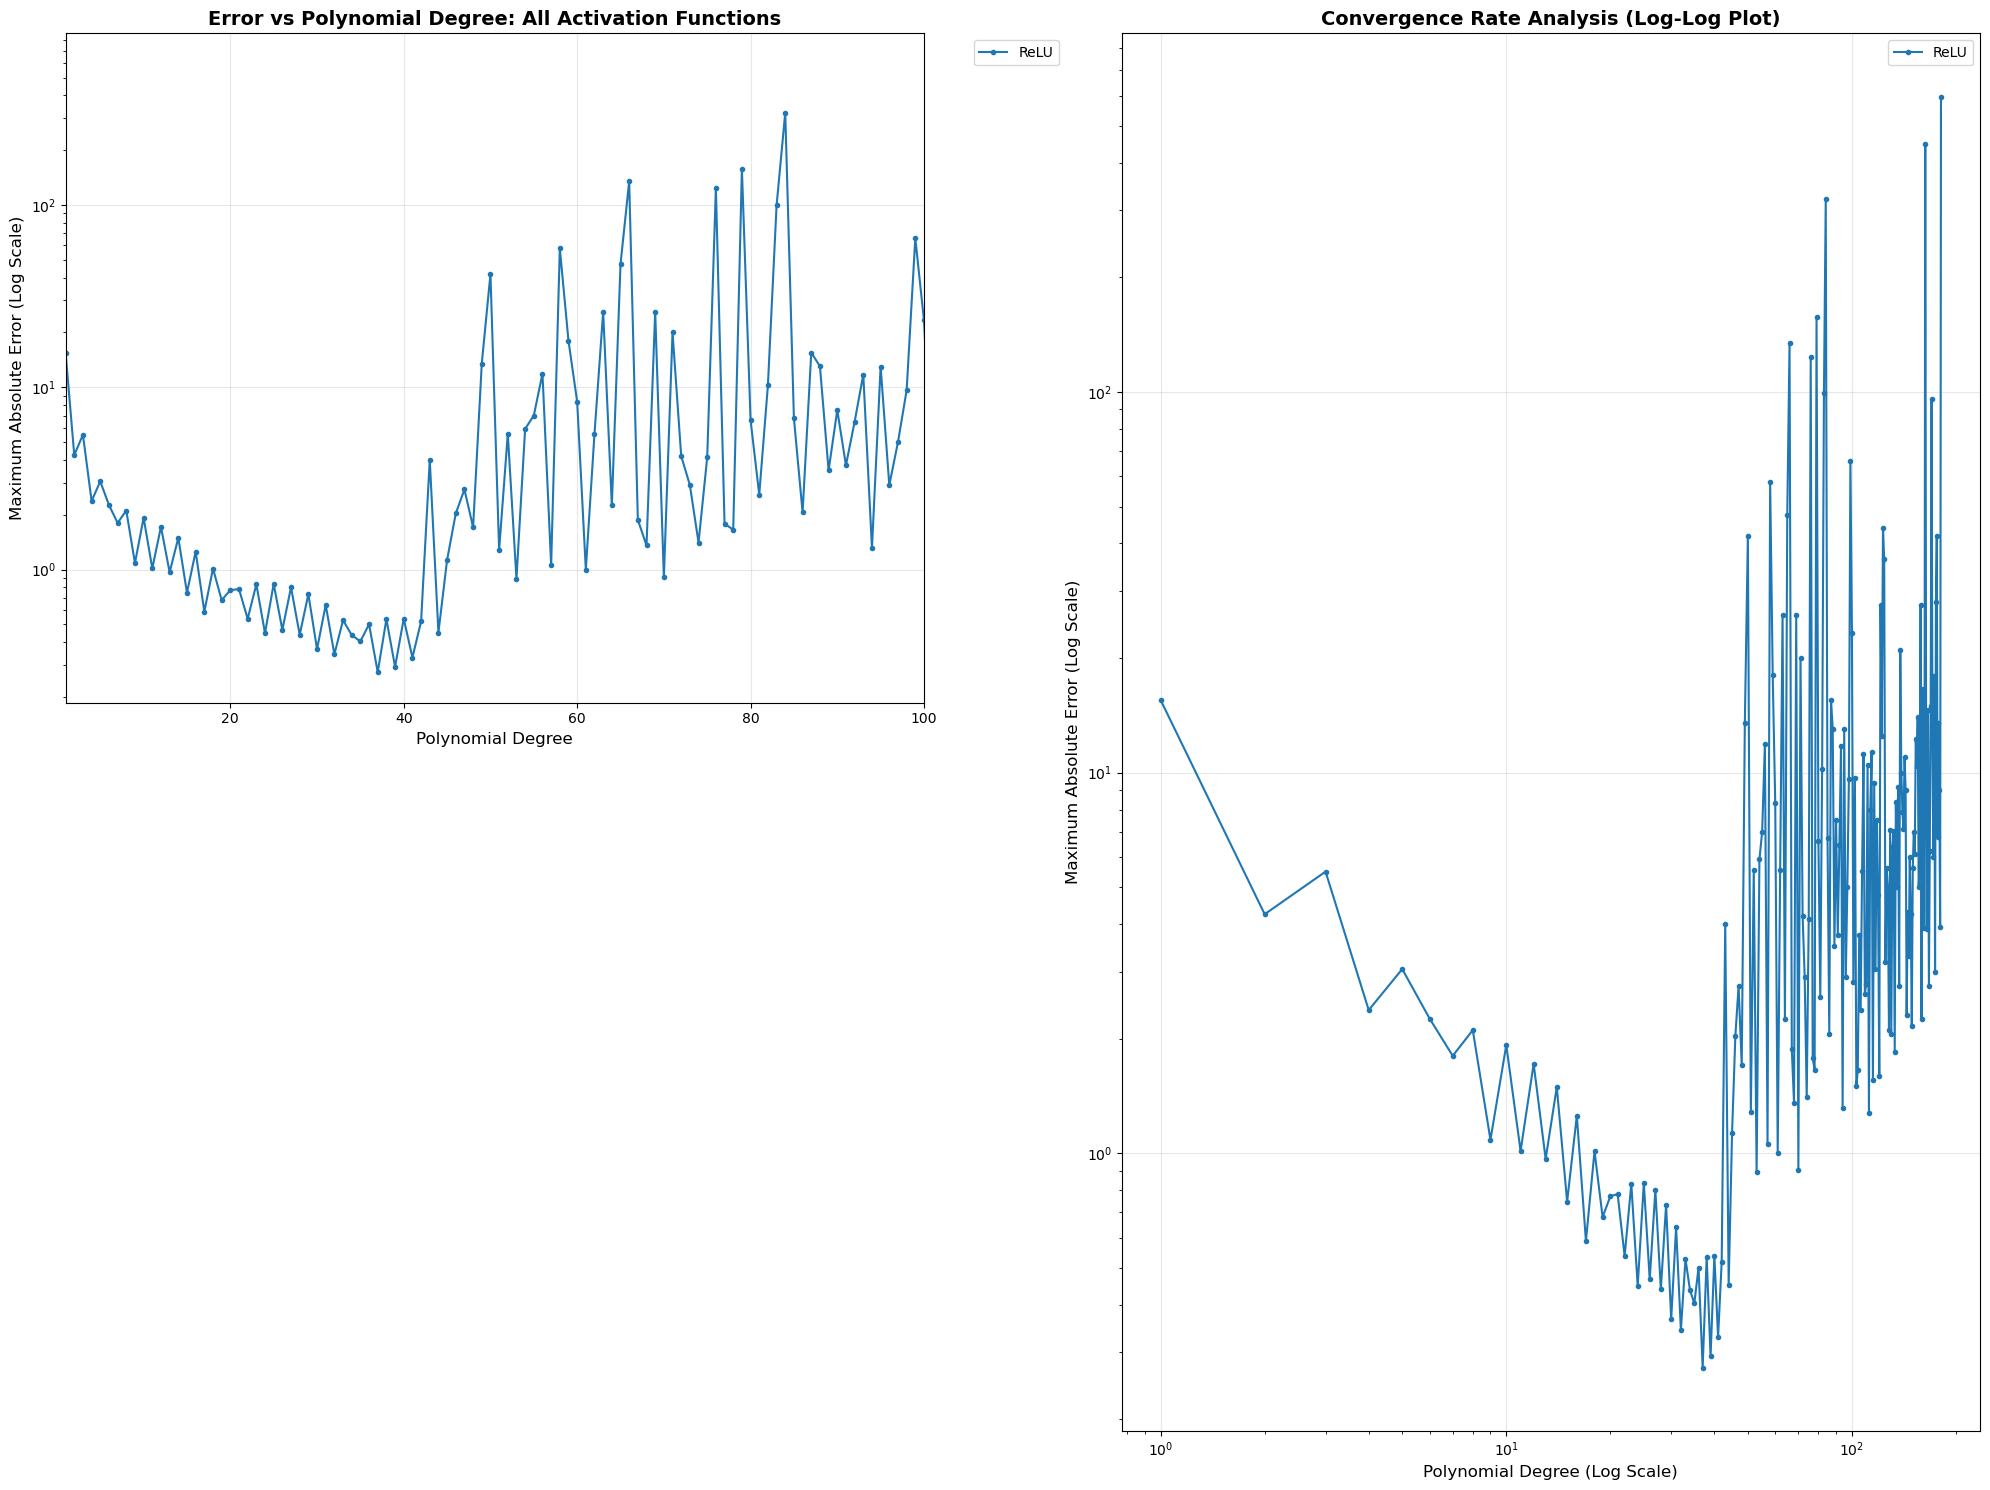


ERROR ANALYSIS SUMMARY
Function        Min Error    @ Degree   Error @ 50   Error @ 100 
--------------------------------------------------------------------------------
ReLU            2.74e-01     37         4.18e+01     2.33e+01    


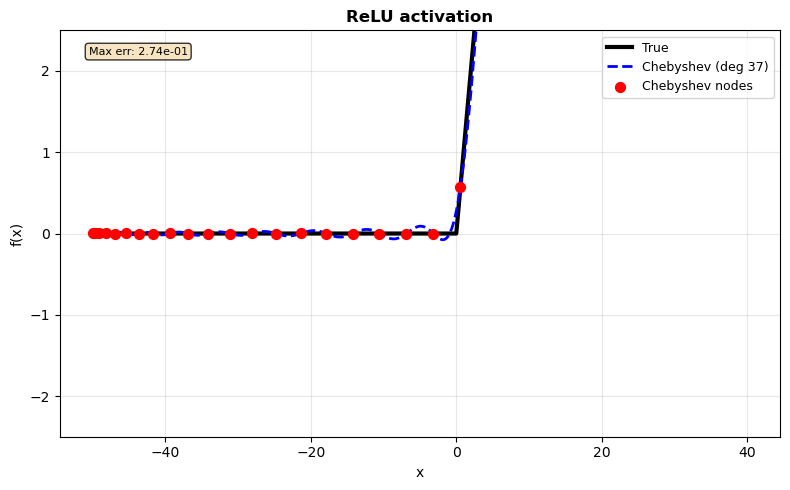

In [3]:
# Chebyshev Curvefitting of the Activation Function - Relu - Beaware of the Domain of training of x , as Chebyshev cannot 
# extrapolate if the Range of the any x element for any vector before the activation function in the dataset exceeds the 
# x_domain criteria

import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             r2_score, max_error)


class ChebyshevActivationInterpolator:
    """
    Interpolates an activation function with an exact Chebyshev‐node
    polynomial to mitigate the Runge phenomenon.
    """

    def __init__(self, expansion_point: float = 0.0):
        self.expansion_point = expansion_point
        self.coefficients: np.ndarray | None = None
        self.degree: int | None = None
        self.x_train: np.ndarray | None = None

    @staticmethod
    def _chebyshev_nodes(a: float, b: float, n: int) -> np.ndarray:
        """n Chebyshev nodes of the first kind on [a, b]."""
        k = np.arange(n)
        nodes_unit = np.cos((2 * k + 1) * np.pi / (2 * n))        # (–1, 1)
        return 0.5 * (b - a) * nodes_unit + 0.5 * (b + a)         # → [a, b]

    def _vandermonde(self, x: np.ndarray, deg: int) -> np.ndarray:
        """Shifted Vandermonde matrix (degree = deg)."""
        return np.vander(x - self.expansion_point, N=deg + 1,
                         increasing=True)

    def fit(self,
            fn,
            x_range: tuple[float, float] = (-50, 40),
            n_points: int = 20) -> "ChebyshevActivationInterpolator":
        """
        Solve the exact interpolation polynomial of degree
        n_points − 1 for `fn` on `x_range`.
        """
        self.x_train = self._chebyshev_nodes(*x_range, n_points)
        y_train = fn(torch.tensor(self.x_train,
                                  dtype=torch.float32)).numpy()

        self.degree = n_points - 1
        V = self._vandermonde(self.x_train, self.degree)
        self.coefficients = np.linalg.solve(V, y_train)
        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """Evaluate the fitted polynomial at `x`."""
        V = self._vandermonde(x, self.degree)
        return V @ self.coefficients

    def max_abs_error(self, fn, x: np.ndarray) -> float:
        """Maximum absolute error of the interpolation on `x`."""
        y_true = fn(torch.tensor(x, dtype=torch.float32)).numpy()
        return np.max(np.abs(y_true - self.predict(x)))

    def equation(self, precision: int = 12) -> str:
        """
        String representation of the polynomial:
        c₀ + c₁ x + c₂ x² + …  (coefficients < 1 e−precision omitted)
        """
        if self.coefficients is None:
            raise RuntimeError("Fit the interpolator first.")

        terms = []
        for i, c in enumerate(self.coefficients):
            if abs(c) < 10**-precision:
                continue
            coeff = f"{c:.{precision}g}"
            if i == 0:
                terms.append(f"{coeff}")
            elif i == 1:
                terms.append(f"{coeff}*x")
            else:
                terms.append(f"{coeff}*x^{i}")
        return " + ".join(terms) if terms else "0"


activation_config = {
    "ReLU": F.relu,
}


def print_polynomial_equations(
    x_range: tuple[float, float] = (-50, 40),
    search_max_degree: int = 300,
    report_degrees: list[int] | None = None,
):
    """
    For every activation in `activation_config`,
    1. find the “best” degree (minimal max-error up to `search_max_degree`);
    2. print the polynomial equation for degrees 10, 20 and best.
    """
    x_test = np.linspace(*x_range, 2001)

    for name, fn in activation_config.items():
        print(f"\n{name} activation :")
        best_deg, best_err = None, np.inf
        interpolators: dict[int, ChebyshevActivationInterpolator] = {}

        # sweep 1…search_max_degree
        for deg in range(1, search_max_degree + 1):
            interp = ChebyshevActivationInterpolator().fit(
                fn, x_range=x_range, n_points=deg + 1
            )
            err = interp.max_abs_error(fn, x_test)
            interpolators[deg] = interp
            if err < best_err:
                best_deg, best_err = deg, err

        # degrees to report
        if report_degrees is None:
            report_degrees = [10, 20]
        report_degrees = sorted(set(report_degrees + [best_deg]))

        for deg in report_degrees:
            interp = interpolators[deg]
            eqn = interp.equation()
            print(f"  • degree {deg:>3} →  {eqn}")

        print(f"    (Best degree = {best_deg},  max-error ≈ {best_err:.3e})")


def analyze_error_vs_degree():
    """Analyze interpolation error vs polynomial degree from 1 to 100"""
    degrees = range(1, 200)
    x_range = (-50, 40)
    
    # Create test data once
    x_test = np.linspace(x_range[0], x_range[1], 1000)
    
    # Storage for results
    error_results = {}
    
    print("Starting systematic error analysis across polynomial degrees 1-100...")
    print("This may take a few minutes...")
    
    for name, fn in activation_config.items():
        print(f"Processing {name}...")
        
        # Evaluate true function
        x_torch = torch.tensor(x_test, dtype=torch.float32)
        y_true = fn(x_torch).numpy()
        
        max_errors = []
        
        for degree in degrees:
            try:
                # Create interpolator with specified degree (degree + 1 points)
                interpolator = ChebyshevActivationInterpolator()
                interpolator.fit(fn, x_range=x_range, n_points=degree + 1)
                
                # Calculate prediction and error
                y_pred = interpolator.predict(x_test)
                max_error = np.max(np.abs(y_true - y_pred))
                max_errors.append(max_error)
                
            except (np.linalg.LinAlgError, RuntimeError):
                # Handle numerical instability for very high degrees
                max_errors.append(np.inf)
        
        error_results[name] = max_errors
    
    return degrees, error_results

def plot_error_analysis(degrees, error_results):
    """Plot comprehensive error analysis"""
    fig = plt.figure(figsize=(20, 15))
    
    ax1 = plt.subplot(2, 2, 1)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(activation_config)))
    
    for i, (name, errors) in enumerate(error_results.items()):
        # Replace inf values with NaN for plotting
        plot_errors = [e if e != np.inf else np.nan for e in errors]
        ax1.semilogy(degrees, plot_errors, '-o', color=colors[i], 
                    label=name, markersize=3, linewidth=1.5)
    
    ax1.set_xlabel('Polynomial Degree', fontsize=12)
    ax1.set_ylabel('Maximum Absolute Error (Log Scale)', fontsize=12)
    ax1.set_title('Error vs Polynomial Degree: All Activation Functions', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.set_xlim(1, 100)
    ax2 = plt.subplot(1, 2, 2)
    selected_functions = ['ReLU']
    
    for name in selected_functions:
        if name in error_results:
            errors = error_results[name]
            finite_errors = [(d, e) for d, e in zip(degrees, errors) if e != np.inf and e > 0]
            if finite_errors:
                d_finite, e_finite = zip(*finite_errors)
                ax2.loglog(d_finite, e_finite, '-o', label=name, markersize=3, linewidth=1.5)
    
    ax2.set_xlabel('Polynomial Degree (Log Scale)', fontsize=12)
    ax2.set_ylabel('Maximum Absolute Error (Log Scale)', fontsize=12)
    ax2.set_title('Convergence Rate Analysis (Log-Log Plot)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def print_error_summary(degrees, error_results):
    """Print summary statistics for error analysis"""
    
    print("\n" + "="*80)
    print("ERROR ANALYSIS SUMMARY")
    print("="*80)
    
    print(f"{'Function':<15} {'Min Error':<12} {'@ Degree':<10} {'Error @ 50':<12} {'Error @ 100':<12}")
    print("-"*80)
    
    for name, errors in error_results.items():
        finite_errors = [e for e in errors if e != np.inf]
        
        if finite_errors:
            min_error = min(finite_errors)
            min_degree = errors.index(min_error) + 1
            error_50 = errors[49] if len(errors) > 49 and errors[49] != np.inf else "N/A"
            error_100 = errors[99] if len(errors) > 99 and errors[99] != np.inf else "N/A"
            print(f"{name:<15} {min_error:<12.2e} {min_degree:<10} {error_50 if error_50 == 'N/A' else f'{error_50:.2e}':<12} {error_100 if error_100 == 'N/A' else f'{error_100:.2e}':<12}")
def compare_interpolation_methods():
    """Plot Chebyshev interpolation for ReLU."""
    name, fn = 'ReLU', activation_config['ReLU']

    fig, ax = plt.subplots(figsize=(8, 5))

    cheb_interp = ChebyshevActivationInterpolator().fit(fn, x_range=(-50, 40), n_points=38)
    x_test = np.linspace(-50, 40, 1000)
    y_true = fn(torch.tensor(x_test, dtype=torch.float32)).numpy()
    y_cheb = cheb_interp.predict(x_test)

    ax.plot(x_test, y_true, label='True', color='black', lw=3)
    ax.plot(x_test, y_cheb, '--', label=f'Chebyshev (deg {cheb_interp.degree})', color='blue', lw=2)
    ax.scatter(cheb_interp.x_train, cheb_interp.predict(cheb_interp.x_train),
               color='red', s=50, label='Chebyshev nodes', zorder=5)

    ax.set_title("ReLU activation", fontweight='bold')
    ax.set_xlabel("x"); ax.set_ylabel("f(x)")
    ax.grid(alpha=0.3); ax.legend(fontsize=9)
    ax.set_ylim([-2.5, 2.5])

    max_err = np.max(np.abs(y_true - y_cheb))
    ax.text(0.04, 0.96, f"Max err: {max_err:.2e}",
            transform=ax.transAxes, va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=8)

    fig.tight_layout()
    plt.show()

def main():
    print("=" * 80)
    print("CHEBYSHEV-POLYNOMIAL EQUATIONS FOR SELECTED DEGREES")
    print("=" * 80)
    print_polynomial_equations()
    degrees, error_results = analyze_error_vs_degree()
    plot_error_analysis(degrees, error_results)
    print_error_summary(degrees, error_results)
    compare_interpolation_methods()


if __name__ == "__main__":
    main()

# As the domain of x increases the error scale of the curvefit also increases for Relu , 
# but for smooth NonLinear Activation functions it does not...

In [4]:
# Now Using a COnventional NN Autoencoder to find the P(Y|X) and P(X|Y) in terms of the Activation function equation i.e.
# the circuit equation as written in the paper as well...

# P(Y|X) = W_3(Relu(W_2(Relu(W_1@X + b_1)+b_2)+b_3)
# P(X|Y) = Relu(W_6(Relu(W_5(Relu(W_4@Y + b_4) + b_5) + b_6)


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import numpy as np
import pickle         


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class AutoencoderClassifier(nn.Module):
    """
    3-layer encoder (classifier) + mirror-image decoder.
    Returns:
        logits   - raw class scores, shape (N,10)
        x_hat    - reconstructed input, shape (N,64)
    """
    def __init__(self):
        super().__init__()

        # ---------- encoder ----------
        self.enc_fc1 = nn.Linear(64, 64)
        self.enc_fc2 = nn.Linear(64, 32)
        self.enc_fc3 = nn.Linear(32, 10)     # logits

        # ---------- decoder (mirror) ----------
        self.dec_fc1 = nn.Linear(10, 32)
        self.dec_fc2 = nn.Linear(32, 64)
        self.dec_fc3 = nn.Linear(64, 64)     # reconstruct input

        self.Relu = nn.ReLU()
        self.layer_activations = {}        

    # ------------------------------------------------------------------
    def forward(self, x):

        # ----- encoder -----

        z = self.enc_fc1(x)
        self.layer_activations["enc_fc1"] = z.detach()
        z = self.Relu(z)

        z = self.enc_fc2(z)
        self.layer_activations["enc_fc2"] = z.detach()
        z = self.Relu(z)

        logits = self.enc_fc3(z)
        self.layer_activations["enc_fc3"] = logits.detach()

        # ----- decoder -----

        d = self.dec_fc1(logits)
        d = self.Relu(z)

        d = self.dec_fc2(d)
        x_hat = self.Relu(self.dec_fc3(d))   

        return logits, x_hat

    # Layers Stats per layer to get the max and min values of x in all the dataset per epoch 
    # to get the domain of x which is used in the Chebyshev Fit of Relu
    def get_layer_stats(self):
        """Return {layer: {'min': v_min, 'max': v_max}, …} for latest fwd."""
        return {n: {'min': a.min().item(), 'max': a.max().item()}
                for n, a in self.layer_activations.items()}


labels_train = torch.arange(50_000) // 5_000            # shape (50 000,)

TrainData   = torch.tensor(input_state_vectors, dtype=torch.float32)
TrainLabels = torch.tensor(labels_train,        dtype=torch.long)

dataset      = TensorDataset(TrainData, TrainLabels)
train_loader = DataLoader(dataset, batch_size=1_000, shuffle=True)

test_dataset = TensorDataset(
    torch.tensor(input_state_test_vectors, dtype=torch.float32),
    torch.tensor(labelss, dtype=torch.long)
)
test_loader  = DataLoader(test_dataset, batch_size=1_000, shuffle=False)


model       = AutoencoderClassifier().to(device)
criterion   = nn.CrossEntropyLoss()
recon_crit  = nn.MSELoss()                    
recon_w     = 1.0                          
optimizer   = optim.Adam(model.parameters(), lr=1e-3)
scheduler   = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, patience=1, factor=0.5
)
num_epochs  = 100

print("Starting training …")
print("=" * 80)


for epoch in range(num_epochs):
    model.train()
    epoch_loss = epoch_cls = epoch_rec = 0.0
    train_correct = 0
    epoch_stats   = {}

    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # ---------- forward ----------
        logits, x_hat = model(x_batch)

        loss_cls = criterion(logits, y_batch)
        loss_rec = recon_crit(x_hat, x_batch)
        loss     = loss_cls + recon_w * loss_rec

        # ---------- backward ----------
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # ---------- metrics ----------
        epoch_loss += loss.item()
        epoch_cls  += loss_cls.item()
        epoch_rec  += loss_rec.item()

        preds = logits.argmax(dim=1)
        train_correct += (preds == y_batch).sum().item()

        batch_stats = model.get_layer_stats()
        for lyr, s in batch_stats.items():
            if lyr not in epoch_stats:
                epoch_stats[lyr] = {'min': s['min'], 'max': s['max']}
            else:
                epoch_stats[lyr]['min'] = min(epoch_stats[lyr]['min'], s['min'])
                epoch_stats[lyr]['max'] = max(epoch_stats[lyr]['max'], s['max'])

    scheduler.step(epoch_loss / len(train_loader))

    # ---------- full-set accuracies ----------
    model.eval()
    with torch.no_grad():
        # train accuracy / reconstruction
        val_correct = 0
        for x_batch, y_batch in train_loader:
            logit, _ = model(x_batch.to(device))
            val_correct += (logit.argmax(1).cpu() == y_batch).sum().item()

        # test accuracy
        test_correct = 0
        for x_batch, y_batch in test_loader:
            logit, _ = model(x_batch.to(device))
            test_correct += (logit.argmax(1).cpu() == y_batch).sum().item()

    N_train = len(dataset)
    N_test  = len(test_dataset)

    print(f"Epoch [{epoch+1:3d}/{num_epochs}] | "
          f"Loss: {epoch_loss/len(train_loader):.4f} "
          f"(cls {epoch_cls/len(train_loader):.4f} + "
          f"rec {epoch_rec/len(train_loader):.4f}) | "
          f"Train Acc: {train_correct/N_train:.4f} | "
          f"Val Acc: {val_correct/N_train:.4f} | "
          f"Test Acc: {test_correct/N_test:.4f}")
    print("Layer activation ranges:")
    for lyr, s in epoch_stats.items():
        print(f"  {lyr:<8}: [{s['min']:.6f}, {s['max']:.6f}]")
    print("-" * 80)

print("Training finished.")
print("=" * 80)

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_7520\909960926.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TrainLabels = torch.tensor(labels_train,        dtype=torch.long)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_7520\909960926.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(input_state_test_vectors, dtype=torch.float32),


Starting training …
Epoch [  1/100] | Loss: 2.2580 (cls 2.2471 + rec 0.0109) | Train Acc: 0.3093 | Val Acc: 0.4724 | Test Acc: 0.5001
Layer activation ranges:
  enc_fc1 : [-0.371778, 0.448122]
  enc_fc2 : [-0.281859, 0.587162]
  enc_fc3 : [-0.292624, 0.569076]
--------------------------------------------------------------------------------
Epoch [  2/100] | Loss: 1.8370 (cls 1.8301 + rec 0.0069) | Train Acc: 0.5274 | Val Acc: 0.6091 | Test Acc: 0.6356
Layer activation ranges:
  enc_fc1 : [-0.374123, 0.862145]
  enc_fc2 : [-0.690105, 1.906274]
  enc_fc3 : [-2.515766, 3.247322]
--------------------------------------------------------------------------------
Epoch [  3/100] | Loss: 1.1618 (cls 1.1580 + rec 0.0038) | Train Acc: 0.6678 | Val Acc: 0.7123 | Test Acc: 0.7399
Layer activation ranges:
  enc_fc1 : [-0.374218, 1.090746]
  enc_fc2 : [-1.327965, 3.425857]
  enc_fc3 : [-6.630510, 6.548524]
--------------------------------------------------------------------------------
Epoch [  4/100

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_7520\651010907.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.95])


Saved → C:\Users\Akshay Patil\Desktop\TrainNew\train_all_classes.png
Saved → C:\Users\Akshay Patil\Desktop\TestNew\test_all_classes.png

Displaying Train Set Composite:


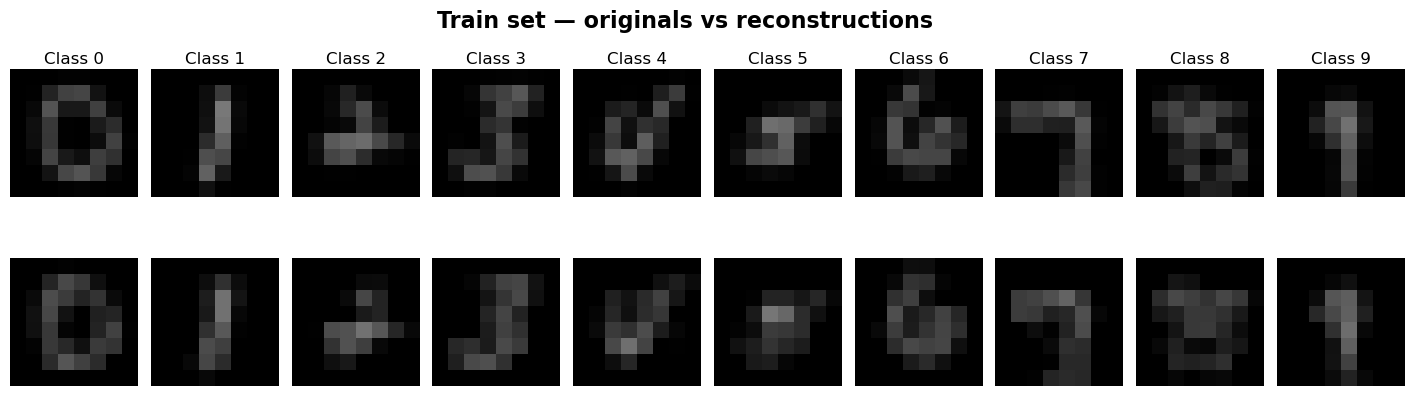


Displaying Test Set Composite:


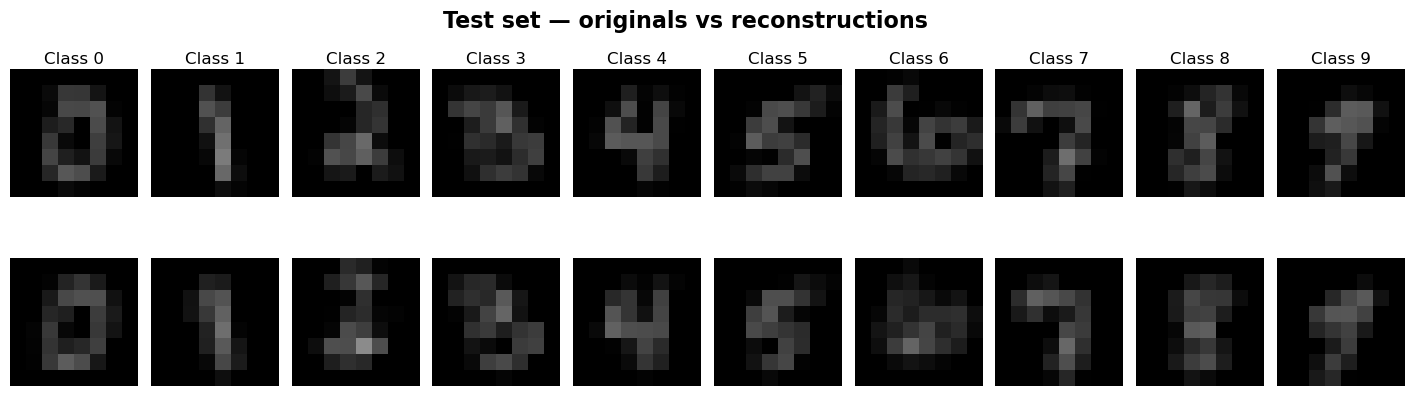

In [5]:
# Plotting the Result of the X_Reconstructed from the Variational Autoencoder both Train and Test -

import os, gc
import torch
import matplotlib.pyplot as plt
from collections import defaultdict


# ─── Configuration ──────────────────────────────────────────────────────────────
TRAIN_SAVE_DIR = r"C:\Users\Akshay Patil\Desktop\TrainNew"
TEST_SAVE_DIR  = r"C:\Users\Akshay Patil\Desktop\TestNew"
SAMPLES_PER_CLASS = 5
TARGET_CLASSES    = 10

os.makedirs(TRAIN_SAVE_DIR, exist_ok=True)
os.makedirs(TEST_SAVE_DIR,  exist_ok=True)

# ─── Sample Collection Functions ────────────────────────────────────────────────
def collect_samples(loader, model, device):
    originals = {c: [] for c in range(TARGET_CLASSES)}
    recons    = {c: [] for c in range(TARGET_CLASSES)}
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            out = model(inputs)
            x_hat = out[-1] if isinstance(out, (tuple, list)) else out
            inp_cpu = inputs.cpu()
            hat_cpu = x_hat.cpu()
            for i, lbl in enumerate(labels.numpy()):
                if len(originals[lbl]) < SAMPLES_PER_CLASS:
                    originals[lbl].append(inp_cpu[i].view(8,8).numpy())
                    recons   [lbl].append(hat_cpu[i].view(8,8).numpy())
            gc.collect()
            if all(len(originals[c])>=SAMPLES_PER_CLASS for c in range(TARGET_CLASSES)):
                break
    return originals, recons

def make_figure(orig, rec, name, save_dir):
    fig = plt.figure(figsize=(18,4.5))
    fig.suptitle(f"{name.capitalize()} set — originals vs reconstructions", fontsize=16, fontweight='bold')
    outer = fig.add_gridspec(2, TARGET_CLASSES, wspace=0.1, hspace=0.2)
    for cls in range(TARGET_CLASSES):
        n = min(len(orig[cls]), SAMPLES_PER_CLASS)
        for row, data in enumerate((orig[cls], rec[cls])):
            for i in range(n):
                ax = fig.add_subplot(outer[row, cls])
                if i==0 and row==0:
                    ax.set_title(f"Class {cls}", pad=4)
                ax.imshow(data[i], cmap='gray', vmin=0, vmax=1)
                ax.axis('off')
    plt.tight_layout(rect=[0,0,1,0.95])
    path = os.path.join(save_dir, f"{name}_all_classes.png")
    plt.savefig(path, dpi=200)
    plt.close(fig)
    print(f"Saved → {path}")
    return path,fig

# ─── Main Execution ──────────────────────────────────────────────────────────────
def main():
    # ensure train_loader, test_loader, model, device exist in globals()
    train_orig, train_rec = collect_samples(train_loader, model, device)
    test_orig,  test_rec  = collect_samples(test_loader,  model, device)

    train_png,figuretrain = make_figure(train_orig, train_rec, "train", TRAIN_SAVE_DIR)
    test_png,figuretest  = make_figure(test_orig,  test_rec,  "test",  TEST_SAVE_DIR)

    # ─ Display in VS Code terminal inline ─────────────────────────
    print("\nDisplaying Train Set Composite:")
    plt.figure(figuretrain)  # Make train_fig the current figure
    plt.show()

    print("\nDisplaying Test Set Composite:")
    plt.figure(figuretest) 
    plt.show()

if __name__ == "__main__":
    main()



In [ ]:
###############################################################################
# Symbolic Autoencoder with Chebyshev-Polynomial ReLU
# Forward pass:  f : ℝ⁶⁴ → ℝ¹⁰,  Φ : ℝ¹⁰ → ℝ⁶⁴
# Weights in Symbolic Notation and hence Prior Via Bayesian Stats and using coordinate Ascent (15th Lecture of Andrew NG)
# and using the Max Likelihood for finding the parameters [W1,W2,W3,Wd1,Wd2,Wd3,b1,b2,b3,bd1,bd2,bd3] 
# explicitly without relying on the heuristic loss function landscape minimization , but
# Quintic equations itself are not solvable , hence we cannot get analytic solutions
# of weights and biases using deterministic interpretation of NN , but we can get 
# log likelihood equation instead of heuristic loss function and now we can maximize that
# or minimize the negative log likehood using the conventional optimization algorithms of ML and DL..
###############################################################################

import sympy as sp
# ----------------------------------------------------------------------------
# 0. Symbols
x  = sp.symbols('x0:64')              # inputs  x0 … x63
y  = sp.symbols('y0:10')              # latent y0 … y9
x_vec = sp.Matrix(x)                  # 64×1
y_vec = sp.Matrix(y)                  # 10×1
# ----------------------------------------------------------------------------
# 1. Chebyshev-polynomial ReLU  (degree-44 fitted, 11 coeffs kept) , the best equation obtained from the above curvefit
coef = [0.0192005849684 , 0.490459097411 , 0.13243252229 , 0.000372376373831 ,
        -0.00166242603093 , -5.68057587183e-06 , 1.30503283601e-05 ,
         4.1224999259e-08 , -6.18319238855e-08 , -1.72304964912e-10 ,
         1.91363055246e-10]
        
def relu_cheb(z):
    out = 0
    for k,c in enumerate(coef):        
        out += c * z**k
    return out
# vectorised version
def A(v): return sp.Matrix([relu_cheb(e) for e in v])   # activation


# 2. Encoder weights (symbolic)
W1 = sp.Matrix(64,64, lambda i,j: sp.Symbol(f'W1_{i}_{j}'))
b1 = sp.Matrix(64,1,  lambda i,_: sp.Symbol(f'b1_{i}'))

W2 = sp.Matrix(32,64, lambda i,j: sp.Symbol(f'W2_{i}_{j}'))
b2 = sp.Matrix(32,1,  lambda i,_: sp.Symbol(f'b2_{i}'))

W3 = sp.Matrix(10,32, lambda i,j: sp.Symbol(f'W3_{i}_{j}'))
b3 = sp.Matrix(10,1,  lambda i,_: sp.Symbol(f'b3_{i}'))

# Forward pass  f(x) ≡ logits
z1 = A(W1*x_vec + b1)          # 64×1
z2 = A(W2*z1    + b2)          # 32×1
logits = W3*z2 + b3            # 10×1  


# 3. Decoder weights (symbolic)
Wd1 = sp.Matrix(32,10, lambda i,j: sp.Symbol(f'Wd1_{i}_{j}'))
bd1 = sp.Matrix(32,1, lambda i,_: sp.Symbol(f'bd1_{i}'))

Wd2 = sp.Matrix(64,32, lambda i,j: sp.Symbol(f'Wd2_{i}_{j}'))
bd2 = sp.Matrix(64,1, lambda i,_: sp.Symbol(f'bd2_{i}'))

Wd3 = sp.Matrix(64,64, lambda i,j: sp.Symbol(f'Wd3_{i}_{j}'))
bd3 = sp.Matrix(64,1, lambda i,_: sp.Symbol(f'bd3_{i}'))

# Forward pass  g(y) ≡ recon
d1 = A(Wd1*y_vec + bd1)        # 32×1
d2 = A(Wd2*d1    + bd2)        # 64×1
x_hat = A(Wd3*d2 + bd3)        # 64×1

# ----------------------------------------------------------------------------
# 4. Conditional probabilities in complete symbolic notation

P_Y_given_X = logits        # All Symbolic even weights and biases , with the vectors x0 to x63 as symbolic included

P_X_given_Y = x_hat         # All Symbolic even weights and biases , with the vectors y0 to y9 as symbolic included


###############################################################################
# The objects of interest
#   • logits   : 10×1 symbolic vector f(x₀,…,x₆₃)
#   • x_hat    : 64×1 symbolic vector Φ(y₀,…,y₉)
#   • P_Y_given_X, P_X_given_Y as above
# Printing the Expressions consume lot of time using sympy library , so the expressions are not printed
# and calls for research in symbolic libraries...
###############################################################################

In [ ]:
###############################################################################
# Complete Symbolic Autoencoder with Trained Weights
# P(Y|X) and P(X|Y) using Chebyshev-Polynomial ReLU and Actual Trained Weights
###############################################################################

import numpy as np, sympy as sp

import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

X_train = np.array(input_state_vectors,dtype = np.float32)
X_test  = np.array(input_state_test_vectors,dtype = np.float32)
y_test  = labelss      

y_train = (np.arange(50000) // 5_000).astype(np.longlong)  # 0-9 blocks

###############################################################################
# 2. CHEBYSHEV-POLY ReLU (degree-44, 11 coeffs kept)
###############################################################################
class PolyReLU(nn.Module):
    coeffs = torch.tensor([
        1.92005849684e-02, 4.90459097411e-01, 1.3243252229e-01,
        3.72376373831e-04,-1.66242603093e-03,-5.68057587183e-06,
        1.30503283601e-05, 4.1224999259e-08,-6.18319238855e-08,
       -1.72304964912e-10, 1.91363055246e-10
    ])
    def forward(self,x):
        out = torch.zeros_like(x)
        for c in reversed(self.coeffs): out = out*x + c
        return out

###############################################################################
# 3. MODEL
###############################################################################
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = nn.Linear(64, 64)
        self.enc2 = nn.Linear(64, 32)
        self.enc3 = nn.Linear(32, 10)      # logits

        self.dec1 = nn.Linear(10, 32)
        self.dec2 = nn.Linear(32, 64)
        self.dec3 = nn.Linear(64, 64)      # x_hat Reconstructed

        self.act = PolyReLU()

    def forward(self,x):
        z = self.act(self.enc2(self.act(self.enc1(x))))
        logits = self.enc3(z)
        d  = self.act(self.dec2(self.act(self.dec1(logits))))
        x̂ = self.act(self.dec3(d))
        return logits, x̂

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Autoencoder().to(device)

train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_ds  = TensorDataset(torch.tensor(X_test ), torch.tensor(y_test))
train_ld = DataLoader(train_ds,batch_size=1_000,shuffle=True)
test_ld  = DataLoader(test_ds ,batch_size=1_000)

ce  = nn.CrossEntropyLoss()
mse = nn.MSELoss(); λ = 1.0
opt = optim.Adam(net.parameters(),lr=1e-3)

for epoch in range(120):                       
    net.train();   tot=cls=rec=0; correct=0
    for xb,yb in train_ld:
        xb,yb = xb.to(device), yb.to(device)
        log,xh = net(xb)
        Lc,Lr = ce(log,yb), mse(xh,xb)
        loss  = Lc + λ*Lr
        opt.zero_grad(); loss.backward(); opt.step()

        tot+=loss.item(); cls+=Lc.item(); rec+=Lr.item()
        correct += (log.argmax(1)==yb).sum().item()

    net.eval()
    with torch.no_grad():

        # test accuracy
        test_correct = 0
        for x_batch, y_batch in test_ld:
            logit, _ = net(x_batch.to(device))
            test_correct += (logit.argmax(1).cpu() == y_batch).sum().item()

    print(f"Epoch {epoch+1:2d} | Total Loss {tot/len(train_ld):.3f} |"
          f"(Encoder Loss {cls/len(train_ld):.3f} + Decoder Loss {rec/len(train_ld):.3f})| "
          f"Train Accuracy {correct/len(train_ds):.3f} |Test Accuracy {test_correct/len(test_ds):.3f}")

sd = net.state_dict()
W1,b1 = sd['enc1.weight'].cpu().numpy(), sd['enc1.bias' ].cpu().numpy()
W2,b2 = sd['enc2.weight'].cpu().numpy(), sd['enc2.bias' ].cpu().numpy()
W3,b3 = sd['enc3.weight'].cpu().numpy(), sd['enc3.bias' ].cpu().numpy()
Wd1,bd1 = sd['dec1.weight'].cpu().numpy(), sd['dec1.bias'].cpu().numpy()
Wd2,bd2 = sd['dec2.weight'].cpu().numpy(), sd['dec2.bias'].cpu().numpy()
Wd3,bd3 = sd['dec3.weight'].cpu().numpy(), sd['dec3.bias'].cpu().numpy()

x  = sp.symbols('x0:64');     y  = sp.symbols('y0:10')
xv = sp.Matrix(x);            yv = sp.Matrix(y)

coef = PolyReLU.coeffs.numpy().tolist()
def φ(z):
    return sum(c*z**k for k,c in enumerate(coef))
def Φ(vec): return sp.Matrix([φ(e) for e in vec])

def mat(A): r,c = A.shape; return sp.Matrix(r,c,lambda i,j:A[i,j])
def vec(b): n   = b.shape[0];return sp.Matrix(n,1,lambda i,_:b[i])

W1,b1 = mat(W1), vec(b1)
W2,b2 = mat(W2), vec(b2)
W3,b3 = mat(W3), vec(b3)
Wd1,bd1 = mat(Wd1), vec(bd1)
Wd2,bd2 = mat(Wd2), vec(bd2)
Wd3,bd3 = mat(Wd3), vec(bd3)

z1 = Φ(W1*xv + b1)                 # 64×1
z2 = Φ(W2*z1 + b2)                 # 32×1
logits = W3*z2 + b3                # 10×1

d1 = Φ(Wd1*yv + bd1)               # 32×1
d2 = Φ(Wd2*d1 + bd2)               # 64×1
x_hat = Φ(Wd3*d2 + bd3)            # 64×1

# P(Y|X)  and  P(X|Y)
P_Y_X  = logits     # Note that these Probabilities are not normalized but the Data train and target vectors are normalized 
P_X_Y  = x_hat      # and hence no need to normalzied it again using softmax or layer norm... as it will unneccessarly increase symbolic computation
# But one can always use Chebyshev Approximation Curvefit of the Softmax as done in our paper 'Deterministic Interpretation of NN'
#  to find the polynomial 
# polynomial curvefit of softmax before normalization and then normalize...


#P_X_hat_Given_X = P_Y_X*P_X_Y can be implemented but symbolic computation takes a lot of time
# also P(X,Y) the joint distribution can be implemented but symbolic computation takes a lot of time

# One can also find P(Y_hat_Given_Y) by constructing the respective autoencoder with input to
# encoder of the autoencoder as Y , output of the encoder as X and the output of decoder as 
# Y_hat , so the encoder will be P(X/Y)*P(Y|X) = P(Y_hat_Given_Y)

# RV = Random Variable...

# Also note that we have taken X (RV of original true ground function of dataset) = X_hat (RV of Model of ground function) in encoder and
# Y (RV of original true ground function of dataset) = Y_hat (RV of Model of ground function obtained from trained model) in decoder , 
# later they both can be computed via P_X_hat_Given_X and P_Y_hat_Given_Y

# If nan error occurs modify the Cheshev Polynomials covering more domain of x p or limit the number of epochs


Epoch  1 | Total Loss 2.284 |(Encoder Loss 2.275 + Decoder Loss 0.009)| Train Accuracy 0.169 |Test Accuracy 0.380
Epoch  2 | Total Loss 2.027 |(Encoder Loss 2.022 + Decoder Loss 0.005)| Train Accuracy 0.482 |Test Accuracy 0.496
Epoch  3 | Total Loss 1.497 |(Encoder Loss 1.493 + Decoder Loss 0.004)| Train Accuracy 0.523 |Test Accuracy 0.650
Epoch  4 | Total Loss 1.051 |(Encoder Loss 1.048 + Decoder Loss 0.003)| Train Accuracy 0.687 |Test Accuracy 0.762
Epoch  5 | Total Loss 0.759 |(Encoder Loss 0.756 + Decoder Loss 0.003)| Train Accuracy 0.766 |Test Accuracy 0.809
Epoch  6 | Total Loss 0.633 |(Encoder Loss 0.630 + Decoder Loss 0.003)| Train Accuracy 0.805 |Test Accuracy 0.828
Epoch  7 | Total Loss 0.572 |(Encoder Loss 0.569 + Decoder Loss 0.003)| Train Accuracy 0.824 |Test Accuracy 0.844
Epoch  8 | Total Loss 0.533 |(Encoder Loss 0.531 + Decoder Loss 0.002)| Train Accuracy 0.838 |Test Accuracy 0.855
Epoch  9 | Total Loss 0.506 |(Encoder Loss 0.503 + Decoder Loss 0.002)| Train Accuracy 0

In [ ]:
import os
from sympy.printing.str import sstr

def fast_weight_print(symbolic_weights):
    """
    Fast printing for large symbolic weight expressions using sympy.sstr
    """
    # Method 1: Use sstr with no ordering
    if hasattr(symbolic_weights, '__iter__') and not isinstance(symbolic_weights, str):
        # For dictionaries or lists of expressions
        result = {}
        for key, expr in symbolic_weights.items():
            result[key] = sstr(expr, order='none')
        return result
    else:
        # For single expressions
        return sstr(symbolic_weights, order='none')

def save_symbolic_results(P_Y_X, P_X_Y, output_dir):
    """
    Save stringified symbolic expressions P(Y|X) and P(X|Y) to text files
    in the specified output directory.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Prepare dictionary of symbolic expressions
    symbolic_weights = {
        'P_Y_given_X': P_Y_X,
        'P_X_given_Y': P_X_Y
    }

    # Convert to fast-printed strings
    fast_weights = fast_weight_print(symbolic_weights)

    # Save each expression to its own .txt file
    for name, expr_str in fast_weights.items():
        file_path = os.path.join(output_dir, f"{name}.txt")
        with open(file_path, 'w') as f:
            f.write(expr_str)

    print(f"Saved P(Y|X) to {os.path.join(output_dir, 'P_Y_given_X.txt')}")
    print(f"Saved P(X|Y) to {os.path.join(output_dir, 'P_X_given_Y.txt')}")

# Usage: replace '/path/to/output_dir' with your desired directory
save_symbolic_results(P_Y_X, P_X_Y, r"C:\Users\Akshay Patil\Desktop\Conditional Posterior")


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_7520\2498925635.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.95])


Saved → C:\Users\Akshay Patil\Desktop\TrainNewChebyshev\train_all_classes.png
Saved → C:\Users\Akshay Patil\Desktop\TestNewChebyshev\test_all_classes.png

Displaying Train Set Composite:


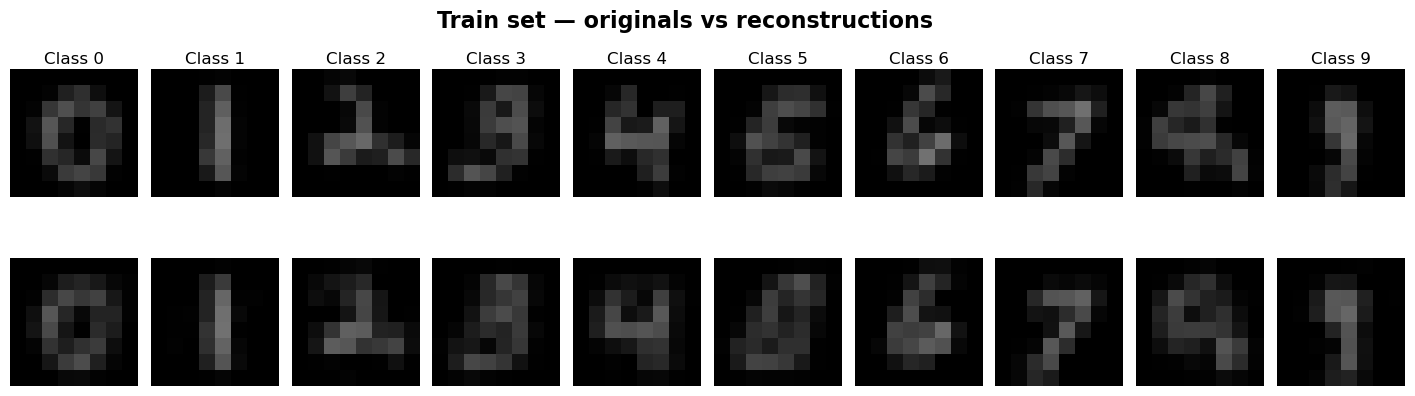


Displaying Test Set Composite:


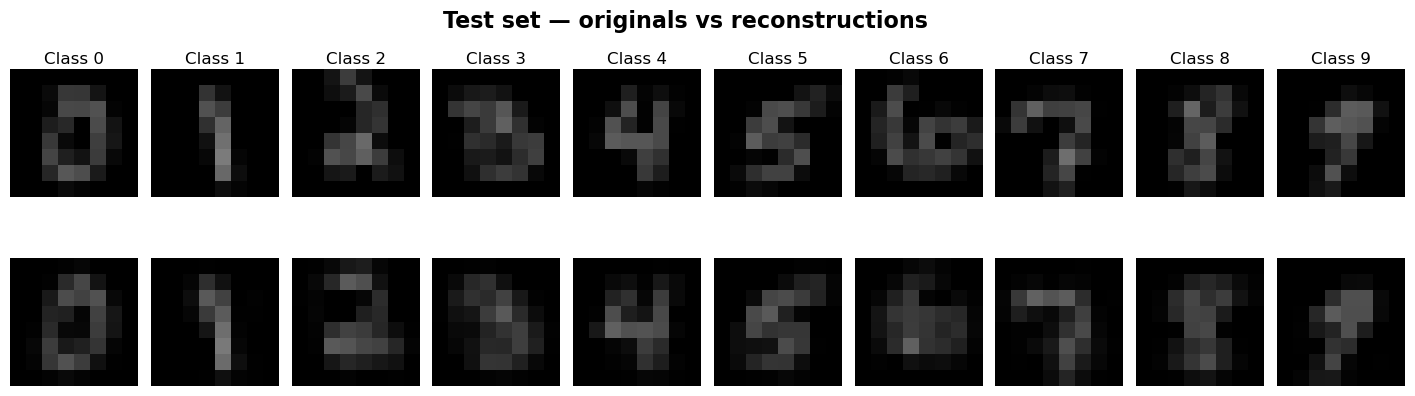

In [10]:
# Plotting the Result of the x_reconstructed from the Variational Autoencoder both Train and Test -

import os, gc
import torch
import matplotlib.pyplot as plt
from collections import defaultdict


# ─── Configuration ──────────────────────────────────────────────────────────────
TRAIN_SAVE_DIR = r"C:\Users\Akshay Patil\Desktop\TrainNewChebyshev"
TEST_SAVE_DIR  = r"C:\Users\Akshay Patil\Desktop\TestNewChebyshev"
SAMPLES_PER_CLASS = 5
TARGET_CLASSES    = 10

os.makedirs(TRAIN_SAVE_DIR, exist_ok=True)
os.makedirs(TEST_SAVE_DIR,  exist_ok=True)

# ─── Sample Collection Functions ────────────────────────────────────────────────
def collect_samples(loader, net, device):
    originals = {c: [] for c in range(TARGET_CLASSES)}
    recons    = {c: [] for c in range(TARGET_CLASSES)}
    net.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            out = net(inputs)
            x_hat = out[-1] if isinstance(out, (tuple, list)) else out
            inp_cpu = inputs.cpu()
            hat_cpu = x_hat.cpu()
            for i, lbl in enumerate(labels.numpy()):
                if len(originals[lbl]) < SAMPLES_PER_CLASS:
                    originals[lbl].append(inp_cpu[i].view(8,8).numpy())
                    recons   [lbl].append(hat_cpu[i].view(8,8).numpy())
            gc.collect()
            if all(len(originals[c])>=SAMPLES_PER_CLASS for c in range(TARGET_CLASSES)):
                break
    return originals, recons

def make_figure(orig, rec, name, save_dir):
    fig = plt.figure(figsize=(18,4.5))
    fig.suptitle(f"{name.capitalize()} set — originals vs reconstructions", fontsize=16, fontweight='bold')
    outer = fig.add_gridspec(2, TARGET_CLASSES, wspace=0.1, hspace=0.2)
    for cls in range(TARGET_CLASSES):
        n = min(len(orig[cls]), SAMPLES_PER_CLASS)
        for row, data in enumerate((orig[cls], rec[cls])):
            for i in range(n):
                ax = fig.add_subplot(outer[row, cls])
                if i==0 and row==0:
                    ax.set_title(f"Class {cls}", pad=4)
                ax.imshow(data[i], cmap='gray', vmin=0, vmax=1)
                ax.axis('off')
    plt.tight_layout(rect=[0,0,1,0.95])
    path = os.path.join(save_dir, f"{name}_all_classes.png")
    plt.savefig(path, dpi=200)
    plt.close(fig)
    print(f"Saved → {path}")
    return path,fig

# ─── Main Execution ──────────────────────────────────────────────────────────────
def main():
    train_orig, train_rec = collect_samples(train_ld, net, device)
    test_orig,  test_rec  = collect_samples(test_ld,  net, device)

    train_png,figuretrain = make_figure(train_orig, train_rec, "train", TRAIN_SAVE_DIR)
    test_png,figuretest  = make_figure(test_orig,  test_rec,  "test",  TEST_SAVE_DIR)

    # ─ Display in VS Code terminal inline ─────────────────────────
    print("\nDisplaying Train Set Composite:")
    plt.figure(figuretrain)  # Make train_fig the current figure
    plt.show()

    print("\nDisplaying Test Set Composite:")
    plt.figure(figuretest) 
    plt.show()

if __name__ == "__main__":
    main()



In [ ]:
# Now Printing the Conditional Posterior Probabilities via Chebyshev Curvefit - Better Symbolic Computation Libraries are needed...


import numpy as np
import sympy as sp
from symbolica import Expression
import time

def sympy_to_symbolica_str(expr):
    """Convert SymPy expression to Symbolica-compatible string"""
    s = str(expr)
    # Replace ** with ^ for exponentiation (Symbolica syntax)
    s = s.replace('**', '^')
    return s

def print_symbolic_expression_advanced(expr, name, max_terms=10, show_complexity=True):
    """Advanced printing with complexity analysis and performance timing"""
    start_time = time.time()
    
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    
    if isinstance(expr, sp.Matrix):
        print(f"Matrix shape: {expr.shape}")
        
        if show_complexity:
            # Show complexity of first element as example
            if expr.rows > 0:
                first_element = expr[0]
                complexity = len(str(first_element))
                print(f"Complexity (first element): {complexity} characters")
                print(f"Number of variables: {len(first_element.free_symbols)}")
        
        # Print elements
        num_elements = min(expr.rows, max_terms)
        for i in range(num_elements):
            element = expr[i]
            element_str = sympy_to_symbolica_str(element)
            
            # For very large expressions, truncate for readability
            if len(element_str) > 200:
                try:
                    element_symbolica = Expression.parse(element_str[:200] + "...")
                    print(f"  [{i}] = {element_symbolica} [TRUNCATED]")
                except:
                    print(f"  [{i}] = {str(element)[:200]}... [TRUNCATED, SymPy]")
            else:
                try:
                    element_symbolica = Expression.parse(element_str)
                    print(f"  [{i}] = {element_symbolica}")
                except:
                    print(f"  [{i}] = {element} (SymPy)")
                    
        if expr.rows > max_terms:
            print(f"  ... and {expr.rows - max_terms} more elements")
    
    end_time = time.time()
    print(f"\nProcessing time: {end_time - start_time:.4f} seconds")

def save_expressions_to_file(P_Y_X, P_X_Y, filename="symbolic_expressions.txt"):
    """Save the symbolic expressions to a text file"""
    with open(filename, 'w') as f:
        f.write("SYMBOLIC EXPRESSIONS FOR CONDITIONAL PROBABILITIES\n")
        f.write("="*80 + "\n\n")
        
        # P(Y|X)
        f.write("P(Y|X) - Probability of Y given X (Logits):\n")
        if isinstance(P_Y_X, sp.Matrix):
            f.write(f"Matrix shape: {P_Y_X.shape}\n")
            for i in range(P_Y_X.rows):
                f.write(f"[{i}] = {P_Y_X[i]}\n")
        else:
            f.write(f"{P_Y_X}\n")
        
        f.write("\n" + "="*80 + "\n\n")
        
        # P(X|Y)
        f.write("P(X|Y) - Probability of X given Y (Reconstructed X):\n")
        if isinstance(P_X_Y, sp.Matrix):
            f.write(f"Matrix shape: {P_X_Y.shape}\n")
            for i in range(P_X_Y.rows):
                f.write(f"[{i}] = {P_X_Y[i]}\n")
        else:
            f.write(f"{P_X_Y}\n")
    
    print(f"Expressions saved to {filename}")


print("\n" + "="*80)
print("PRINTING SYMBOLIC EXPRESSIONS WITH SYMBOLICA")
print("="*80)

# Method 1: Print to console with Symbolica (fast display)
print_symbolic_expression_advanced(P_Y_X, "P(Y|X) - Conditional Probability (Logits)")
print_symbolic_expression_advanced(P_X_Y, "P(X|Y) - Conditional Probability (Reconstruction)")



PRINTING SYMBOLIC EXPRESSIONS WITH SYMBOLICA

P(Y|X) - Conditional Probability (Logits)
Matrix shape: (10, 1)
Complexity (first element): 164737833 characters
Number of variables: 64
  [0] = 6.86394619056617*x0 + 2.07330528716421*x1 - 1.57989323554286*x10 + 0.758337486598664*x11 + 1.17293377604481*x12 + 0.711544967078232*x13 - 1.75657277491862*x14 - 5.22348770651878*x15 - 4.19560123298575... [TRUNCATED, SymPy]


In [ ]:

# Method 2: Save complete expressions to file (for detailed analysis)
save_expressions_to_file(P_Y_X, P_X_Y, "autoencoder_symbolic_expressions.txt")
save_expressions_to_file(P_Y_given_X,P_X_given_Y, "autoencoder_symbolic_expressionstotalsymbolic.txt")


print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("- Console output shows first 10 elements with Symbolica formatting")
print("- Complete expressions saved to 'autoencoder_symbolic_expressions.txt'")
print("- Use Symbolica for fast symbolic computation and display")

print("\n" + "="*80)
print("PRINTING SYMBOLIC EXPRESSIONS WITH SYMBOLICA")
print("="*80)


In [ ]:
# Other way to print and save using sympy library 

import os
from sympy.printing.str import sstr

def fast_weight_print(symbolic_weights):
    """
    Fast printing for large symbolic weight expressions using sympy.sstr
    """
    # Method 1: Use sstr with no ordering
    if hasattr(symbolic_weights, '__iter__') and not isinstance(symbolic_weights, str):
        # For dictionaries or lists of expressions
        result = {}
        for key, expr in symbolic_weights.items():
            result[key] = sstr(expr, order='none')
        return result
    else:
        # For single expressions
        return sstr(symbolic_weights, order='none')

def save_symbolic_results(P_Y_X, P_X_Y, output_dir):
    """
    Save stringified symbolic expressions P(Y|X) and P(X|Y) to text files
    in the specified output directory.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Prepare dictionary of symbolic expressions
    symbolic_weights = {
        'P_Y_given_X': P_Y_X,
        'P_X_given_Y': P_X_Y
    }

    # Convert to fast-printed strings
    fast_weights = fast_weight_print(symbolic_weights)

    # Save each expression to its own .txt file
    for name, expr_str in fast_weights.items():
        file_path = os.path.join(output_dir, f"{name}.txt")
        with open(file_path, 'w') as f:
            f.write(expr_str)

    print(f"Saved P(Y|X) to {os.path.join(output_dir, 'P_Y_given_X.txt')}")
    print(f"Saved P(X|Y) to {os.path.join(output_dir, 'P_X_given_Y.txt')}")

# Usage: replace '/path/to/output_dir' with your desired directory
save_symbolic_results(P_Y_X, P_X_Y, r"C:\Users\Akshay Patil\Desktop\Conditional Posterior")

In [ ]:
# Need for Symbolic Computation Libraries Research for faster compute , faster simplifying the expressions and faster operations on these expressions
# So That P(X_hat|X) , P(Y_hat|Y) , P(X,Y) can be computed
# Also the likelihood Computation and finding the exponential family plus the residual family of the dataset via 
# symbolic libraries needs faster libraries or more compute for faster exececution and simplication and symbolic operation
# on the symbolic expressions gotten via Chebyshev Activation Approximation of Relu via NN Model...